In [1]:
import geopandas as gpd
import pandas as pd
import os

In [2]:
land2023 = pd.read_csv("./Processed/Change_Percentage_05to10.csv")
land2023.head()
land2023['County_clean'] = land2023['County'].str.upper().str.replace(" COUNTY", "", regex=False)

In [25]:
storm2023 = pd.read_csv("./selected_storm_df.csv")
storm2023.head()
storm2023.dtypes

YEAR                        int64
EVENT_ID                    int64
CZ_NAME                    object
STATE                      object
EVENT_TYPE                 object
BEGIN_DATE_TIME            object
END_DATE_TIME              object
event_duration_minutes    float64
dtype: object

In [26]:
storm2023 = storm2023[(storm2023["YEAR"] >= 2018) & (storm2023["YEAR"] <= 2023)]

In [27]:
storm_count = storm2023.groupby(["CZ_NAME"]).size().reset_index(name='storm_count')
storm_count['County_clean'] = storm_count['CZ_NAME'].str.upper()

In [2]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [37]:
merged_df = pd.merge(
    land2023,
    storm_count,
    how='left',
    on='County_clean'
)
merged_df.dropna(subset=["Late_Avg"], inplace=True)
merged_df.dropna(subset=["storm_count"], inplace=True)

In [38]:
Mixed_Forest = merged_df[(merged_df["LC_Grouped"] == 'mixed forest')]
Wetland = merged_df[(merged_df["LC_Grouped"] == 'wetland')]
Developed_sites = merged_df[(merged_df["LC_Grouped"] == 'developed sites')]

In [39]:
X = Mixed_Forest[['Late_Avg']]
y = Mixed_Forest['storm_count']

model = LinearRegression()
model.fit(X, y)

print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)
print("R^2 Score:", model.score(X, y))

Coefficient: 0.10926367647703504
Intercept: 5.967809565515902
R^2 Score: 0.007977775954700728


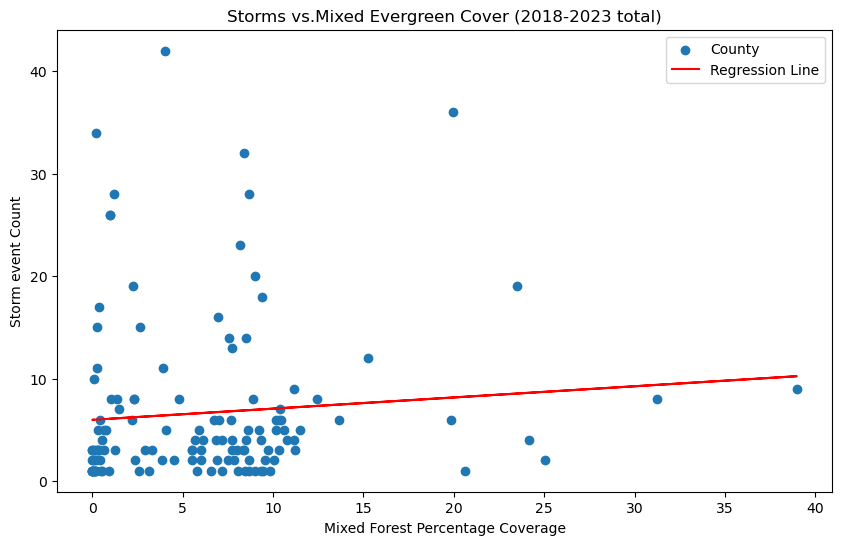

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='County')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel("Mixed Forest Percentage Coverage")
plt.ylabel("Storm event Count")
plt.legend()
plt.title("Storms vs.Mixed Evergreen Cover (2018-2023 total)")
plt.show()

In [ ]:
df = pd.read_csv("./NLCD/Processed/Combined_NLCD.csv")

developed_types = [
    "Developed Open Space",
    "Developed Low Intensity",
    "Developed Medium Intensity",
    "Developed High Intensity"
]

Coefficient: -0.22466162817337088
Intercept: 8.189408549235413
R^2 Score: 0.03603994940249833


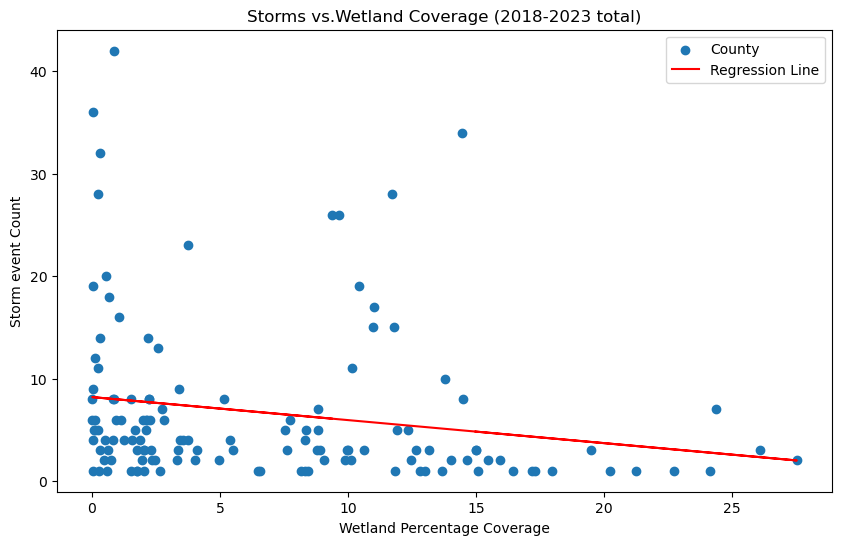

In [43]:
X = Wetland[['Late_Avg']]
y = Wetland['storm_count']

model = LinearRegression()
model.fit(X, y)

print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)
print("R^2 Score:", model.score(X, y))

plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='County')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel("Wetland Percentage Coverage")
plt.ylabel("Storm event Count")
plt.legend()
plt.title("Storms vs.Wetland Coverage (2018-2023 total)")
plt.show()

Coefficient: 0.3592359377539881
Intercept: 5.361302115436566
R^2 Score: 0.024564969129918346


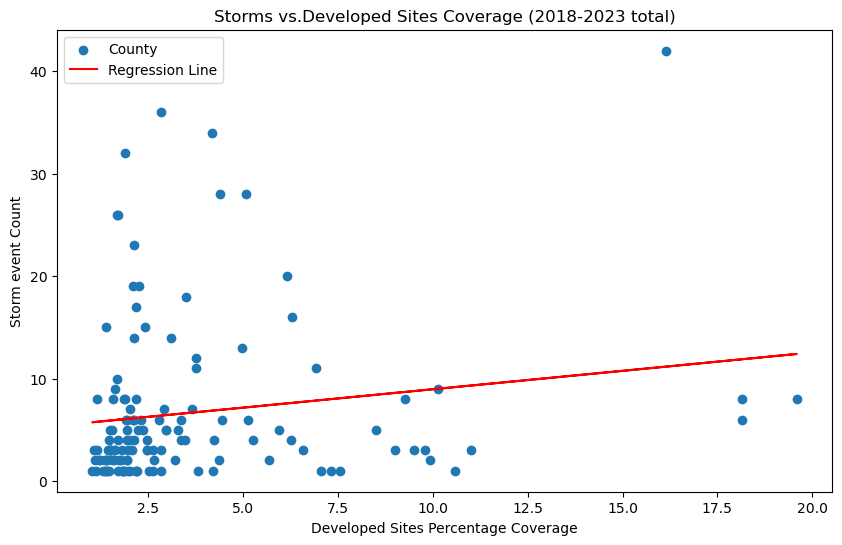

In [44]:
X = Developed_sites[['Late_Avg']]
y = Developed_sites['storm_count']

model = LinearRegression()
model.fit(X, y)

print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)
print("R^2 Score:", model.score(X, y))

plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='County')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel("Developed Sites Percentage Coverage")
plt.ylabel("Storm event Count")
plt.legend()
plt.title("Storms vs.Developed Sites Coverage (2018-2023 total)")
plt.show()

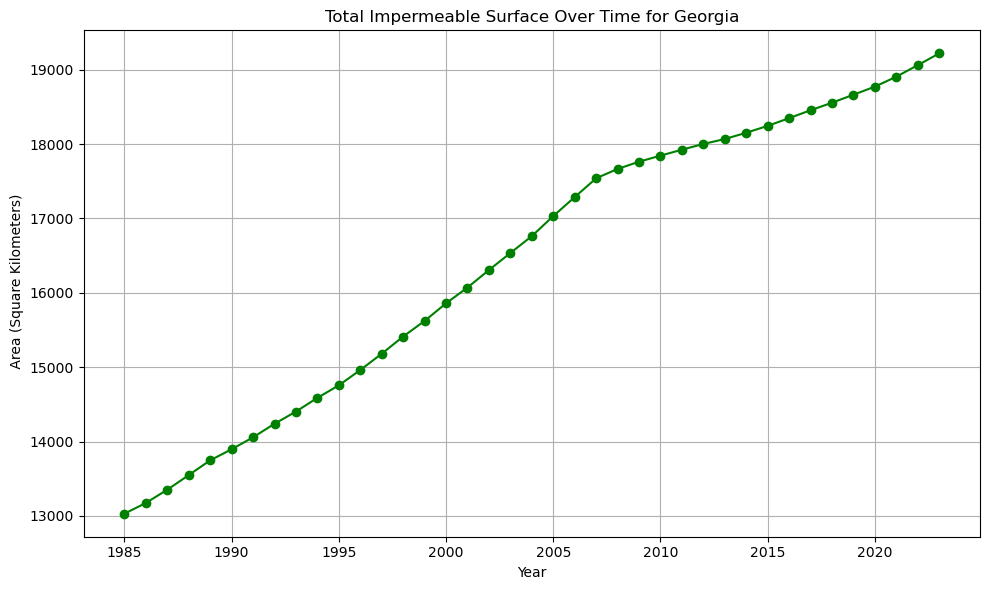

In [8]:
#把3个画在一张图上 都看从100%的变化
df = pd.read_csv("./NLCD/Processed/Combined_NLCD.csv")

developed_types = [
    "Developed Open Space",
    "Developed Low Intensity",
    "Developed Medium Intensity",
    "Developed High Intensity"
]

developed_df = df[df["Period"].isin(developed_types)]

avg_impermeable_by_year = (
    developed_df.groupby("Year")["Area"].sum()
)

plt.figure(figsize=(10, 6))
avg_impermeable_by_year.plot(marker='o',color = 'green')
plt.title("Total Impermeable Surface Over Time for Georgia")
plt.xlabel("Year")
plt.ylabel(" Area (Square Kilometers)")
plt.grid(True)
plt.tight_layout()
plt.show()

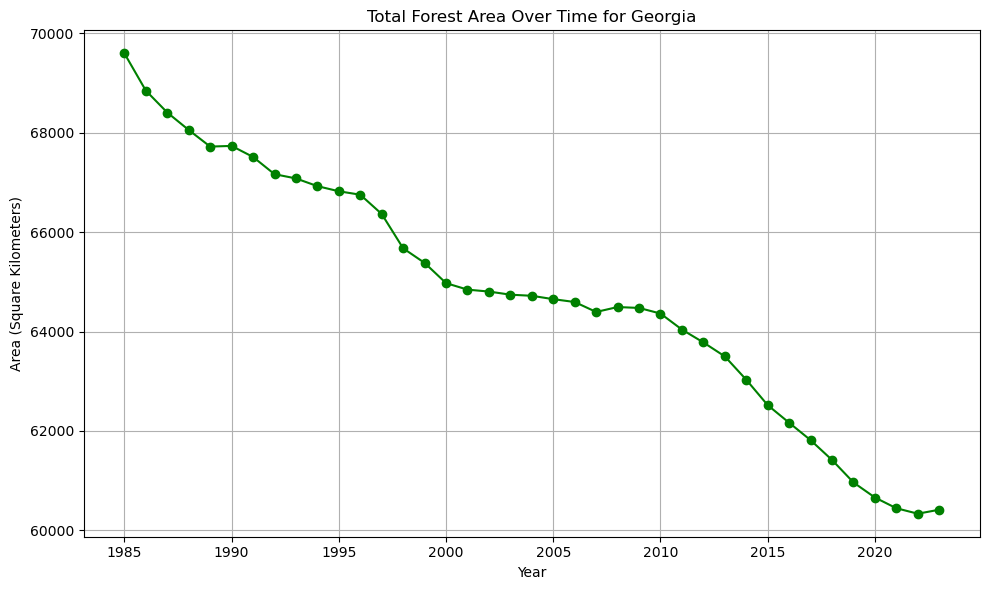

In [3]:
df = pd.read_csv("./NLCD/Processed/Combined_NLCD.csv")

Forest_types = [
    "Deciduous Forest",
    "Evergreen Forest",
    "Mixed Forest"
]

forest_df = df[df["Period"].isin(Forest_types)]

avg_forest_by_year = (
    forest_df.groupby("Year")["Area"].sum()
)

plt.figure(figsize=(10, 6))
avg_forest_by_year.plot(marker='o',color = 'green')
plt.title("Total Forest Area Over Time for Georgia")
plt.xlabel("Year")
plt.ylabel("Area (Square Kilometers)")
plt.grid(True)
plt.tight_layout()
plt.show()

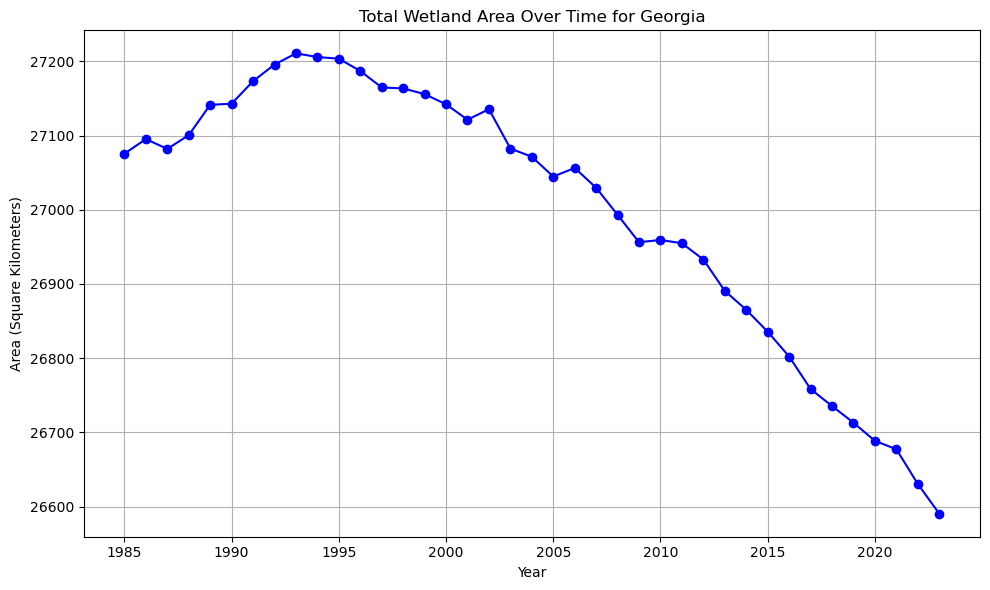

In [6]:
Wetland_types = [
    "Woody Wetlands",
    "Emergent Herbaceous Wetlands"
]

wetland_df = df[df["Period"].isin( Wetland_types)]

avg_wetland_by_year = (
    wetland_df.groupby("Year")["Area"].sum()
)

plt.figure(figsize=(10, 6))
avg_wetland_by_year.plot(marker='o',color = 'blue')
plt.title("Total Wetland Area Over Time for Georgia")
plt.xlabel("Year")
plt.ylabel("Area (Square Kilometers)")
plt.grid(True)
plt.tight_layout()
plt.show()

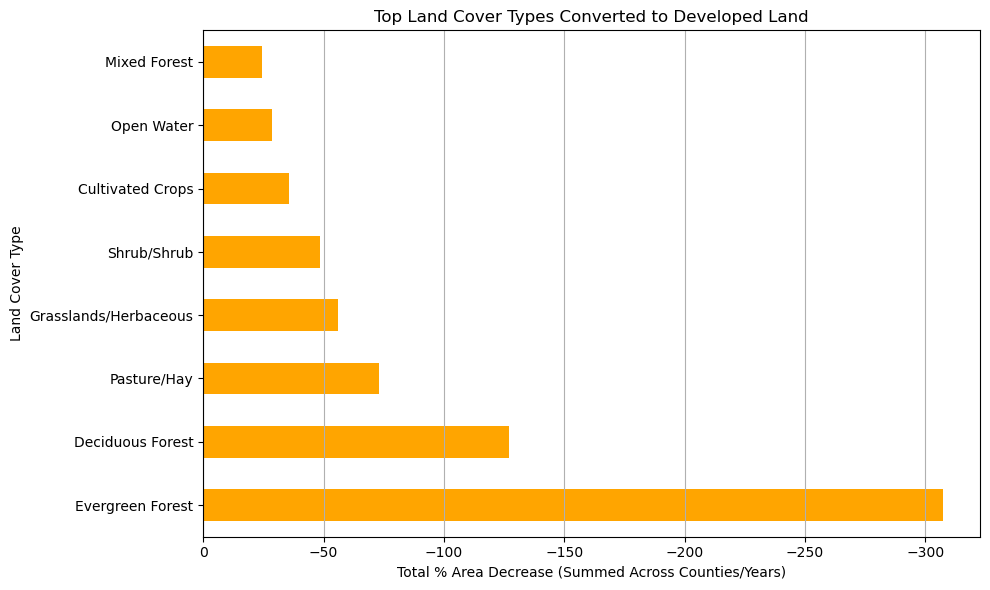

In [7]:
Developed_percentage = pd.read_csv('./NLCD_percent/Processed/Combined_NLCD_percentage.csv')
developed_types = [
    "Developed Open Space",
    "Developed Low Intensity",
    "Developed Medium Intensity",
    "Developed High Intensity"
]

pivot_df = Developed_percentage.pivot_table(
    index=["County", "Year"], 
    columns="LC_Types", 
    values="Area_Percentage"
).fillna(0)

change_df = pivot_df.groupby(level=0).diff()
developed_change = change_df[[
    "Developed Open Space",
    "Developed Low Intensity",
    "Developed Medium Intensity", 
    "Developed High Intensity"
]]

significant_dev = developed_change.sum(axis=1) > 0.2
converted_land_df = change_df[significant_dev]

land_converted_from = converted_land_df.drop(columns=developed_change.columns)
converted_land_summary = land_converted_from[land_converted_from < 0].sum().sort_values()

plt.figure(figsize=(10, 6))
converted_land_summary.head(8).plot(kind="barh", color="orange")
plt.title("Top Land Cover Types Converted to Developed Land")
plt.xlabel("Total % Area Decrease (Summed Across Counties/Years)")
plt.ylabel("Land Cover Type")
plt.gca().invert_xaxis()
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


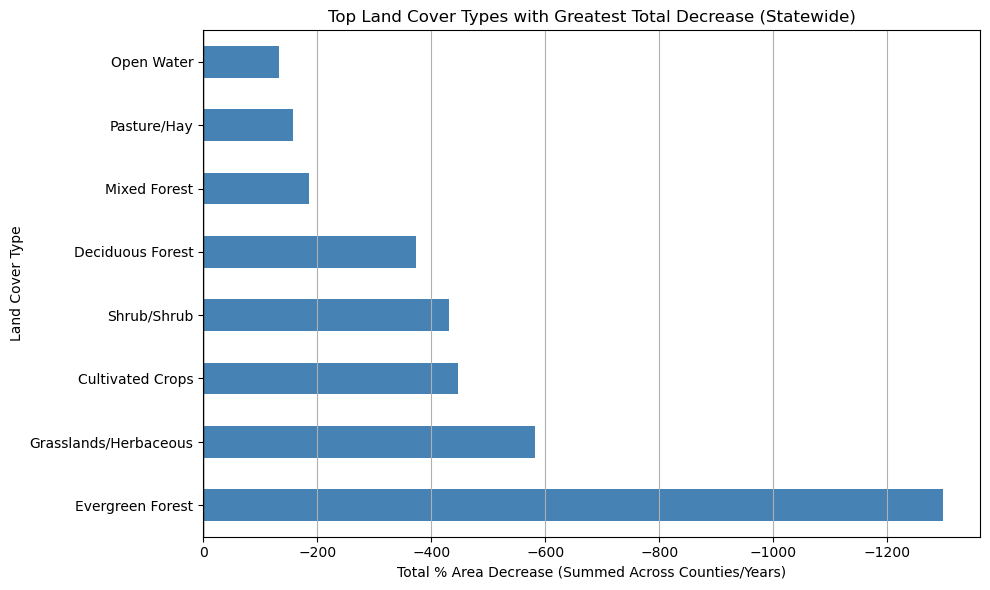

In [14]:
all_change_df = pivot_df.groupby(level=0).diff()

# Only keep the negative changes (i.e., decreases)
total_negative_changes = all_change_df[all_change_df < 0].sum().sort_values()

# Plot the top 8 most decreased land cover types across all counties and years
plt.figure(figsize=(10, 6))
total_negative_changes.head(8).plot(kind="barh", color="steelblue")
plt.title("Top Land Cover Types with Greatest Total Decrease (Statewide)")
plt.xlabel("Total % Area Decrease (Summed Across Counties/Years)")
plt.ylabel("Land Cover Type")
plt.axvline(x=0, color='black', linewidth=1)
plt.gca().invert_xaxis()
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

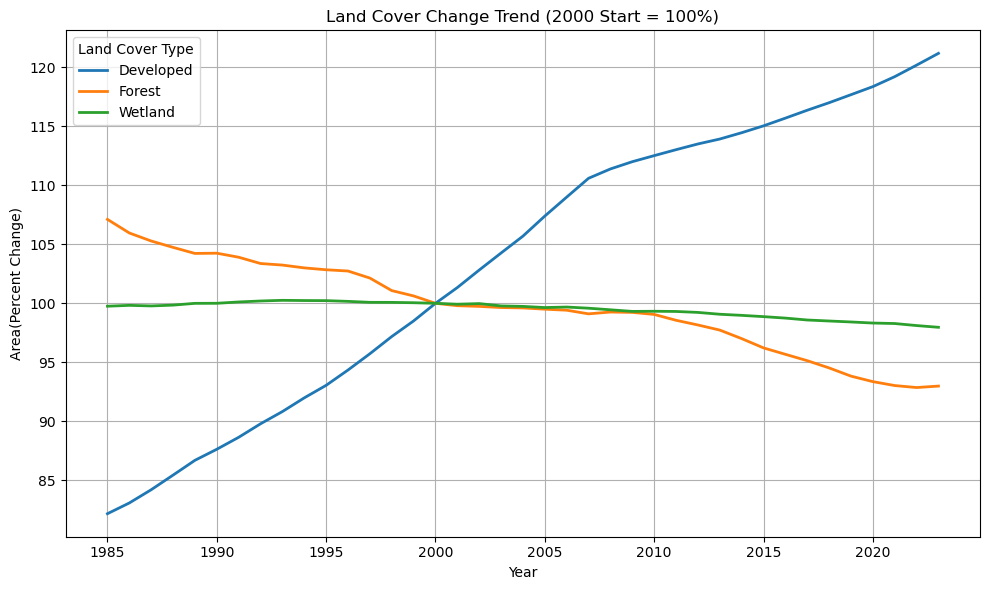

In [ ]:
import pandas as pd
nlcd_df = pd.read_csv("./NLCD/Processed/Combined_NLCD.csv")
forest_types = ['Deciduous Forest', 'Evergreen Forest', 'Mixed Forest']
developed_types = [
    'Developed Open Space',
    'Developed Low Intensity',
    'Developed Medium Intensity',
    'Developed High Intensity'
]
wetland_types = ['Woody Wetlands', 'Emergent Herbaceous Wetlands']

def categorize_lc(period):
    if period in forest_types:
        return 'Forest'
    elif period in developed_types:
        return 'Developed'
    elif period in wetland_types:
        return 'Wetland'
    else:
        return None

nlcd_df['Category'] = nlcd_df['Period'].apply(categorize_lc)

filtered_df = nlcd_df[nlcd_df['Category'].notnull()]
trend_df = filtered_df.groupby(['Year', 'Category'])['Area'].sum().reset_index()
pivot_df = trend_df.pivot(index='Year', columns='Category', values='Area')
normalized_df = pivot_df.divide(pivot_df.iloc[0]).multiply(100)

import matplotlib.pyplot as plt

normalized_df.plot(figsize=(10, 6), linewidth=2)
plt.title('Land Cover Change Trend (2000 Start = 100%)')
plt.ylabel('Area(Percent Change)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Land Cover Type')
plt.show()


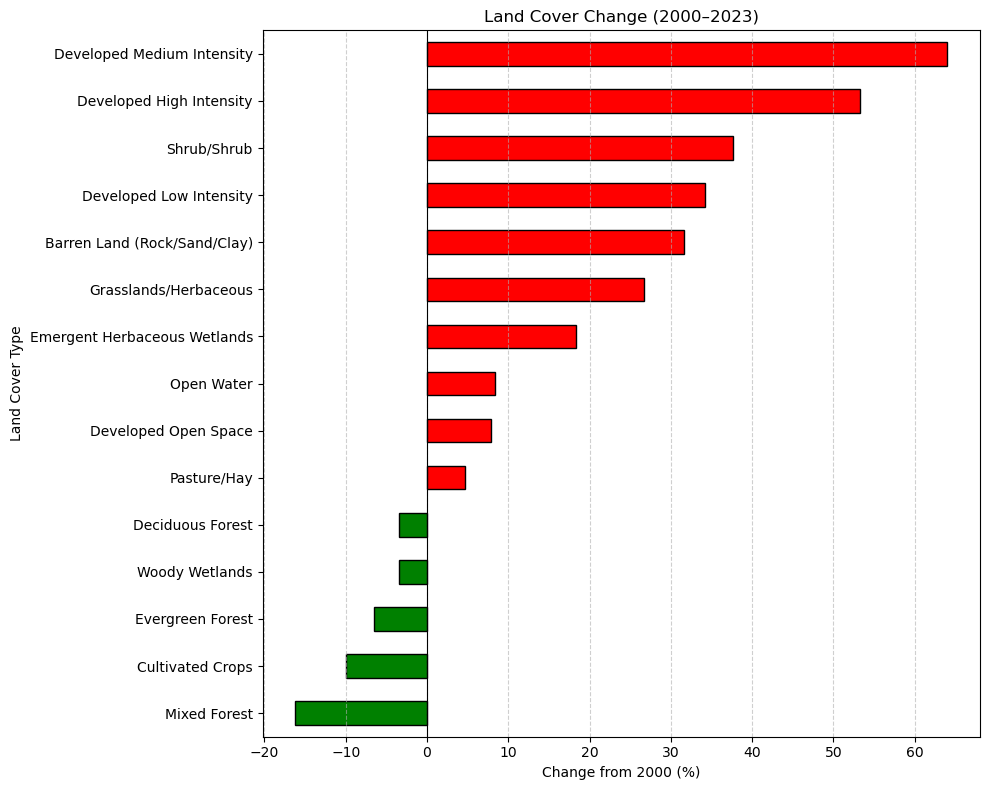

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
nlcd_df = pd.read_csv("./NLCD/Processed/Combined_NLCD.csv")
nlcd_df = nlcd_df.rename(columns={"Period": "Land_Cover_Types"})
full_grouped = nlcd_df.groupby(['Year', 'Land_Cover_Types'])['Area'].sum().reset_index()


full_pivot = full_grouped.pivot(index='Year', columns='Land_Cover_Types', values='Area')
normalized_all = full_pivot.divide(full_pivot.loc[2000]).multiply(100)
change_from_2000 = normalized_all.loc[2023] - 100
sorted_change = change_from_2000.sort_values()

# Plotting
plt.figure(figsize=(10, 8))
sorted_change.plot(
    kind='barh',
    color=['green' if x < 0 else 'red' for x in sorted_change],
    edgecolor='black'
)
plt.xlabel('Change from 2000 (%)')
plt.ylabel('Land Cover Type')
plt.title('Land Cover Change (2000–2023)')
plt.axvline(0, color='black', linewidth=0.8)
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

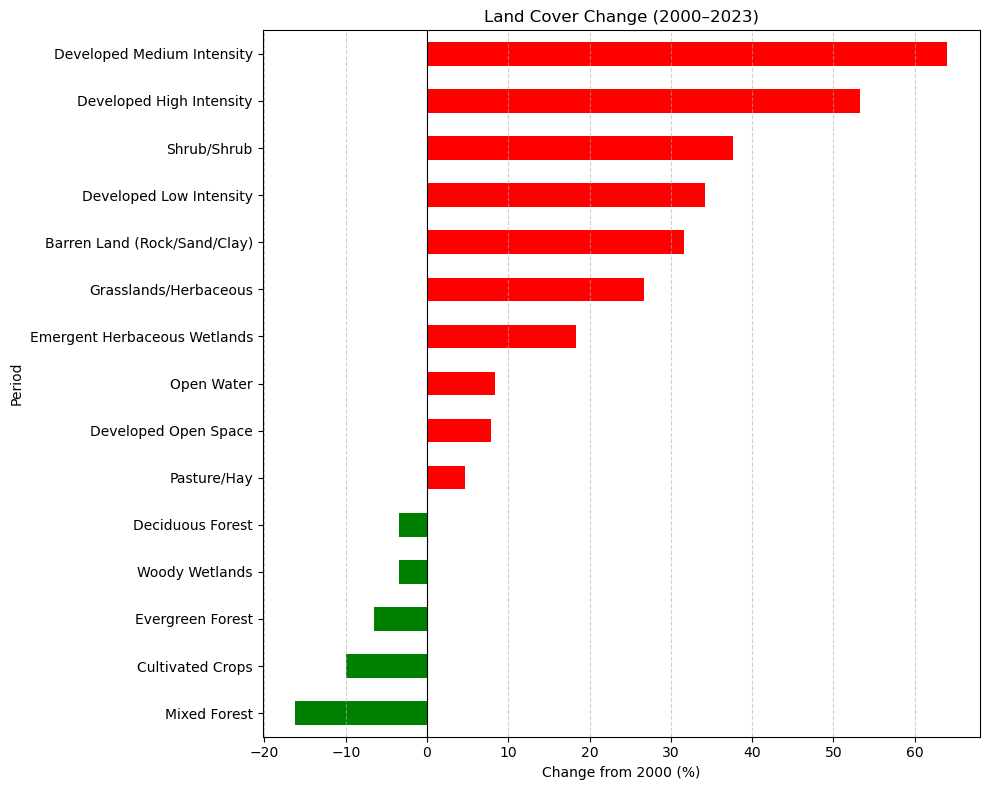

In [6]:
sorted_change = change_from_2000.sort_values()

plt.figure(figsize=(10, 8))
sorted_change.plot(kind='barh', color=['green' if x < 0 else 'red' for x in sorted_change])
plt.xlabel('Change from 2000 (%)')
plt.title('Land Cover Change (2000–2023)')
plt.axvline(0, color='black', linewidth=0.8)
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
